This jupyter-notebook has be created with 'jupytext'.

Use this [Link](https://colab.research.google.com/github/magnumnp/magnumnp_demos/blob/main/sp_FMR.ipynb) to directly open the Notebook in Google Colab.

## Install magnum.np and fetch reference data (required for Colab)

In [1]:
!pip install -q triton magnumnp
from os import path
if not path.isdir("ref"):
    !mkdir ref
    !wget -P ref https://gitlab.com/magnum.np/magnum.np/raw/main/demos/sp_FMR/ref/m.dat &> /dev/null

# FMR Standard Problem

## Run Simulation

In [2]:
from magnumnp import *
import torch
import pathlib
from tqdm import tqdm

set_log_level(25) # show info_green, but hide info_blue
Timer.enable()
try:
    this_dir = pathlib.Path(__file__).resolve().parent
except:
    this_dir = pathlib.Path().resolve()

# initialize state
dt = 5e-12
n = (24, 24, 2)
l = (120e-9, 120e-9, 10e-9)
dx = (l[0]/n[0], l[1]/n[1], l[2]/n[2])
origin = (-n[0]*dx[0]/2., -n[1]*dx[1]/2., -n[2]*dx[2]/2.)
mesh = Mesh(n, dx, origin=origin)

state = State(mesh)
state.material = {
    "alpha": 0.008,
    "Ms": 800e3,
    "A": 13e-12
    }
state.m = state.Constant([0, 0, 1])

# initialize field terms
demag    = DemagField()
exchange = ExchangeField()
bias     = ExternalField(80e3*normalize(state.Constant([1., 0.715, 0])))

#relax state
minimizer = MinimizerBB([demag, exchange, bias])
minimizer.minimize(state)

#integrate
bias = ExternalField(80e3*normalize(state.Constant([1., 0.7, 0])))

llg = LLGSolver([demag, exchange, bias])
logger = Logger(this_dir / "data", ['t', 'm'])

for i in tqdm(torch.arange(0, 10e-9, dt)):
    llg.step(state, dt)
    logger << state

Timer.print_report()

2024-11-25 11:26:21  magnum.np:INFO magnum.np 2.0.1


2024-11-25 11:26:21  magnum.np:INFO [State] running on device: cpu (dtype = float64)


2024-11-25 11:26:21  magnum.np:INFO [Mesh] 24x24x2 (dx= 5e-09 x 5e-09 x 5e-09)


2024-11-25 11:26:30  magnum.np:INFO [LLGSolver] using RKF45 solver (atol = 1e-05)


  0%|          | 0/2001 [00:00<?, ?it/s]

  0%|          | 2/2001 [00:00<02:27, 13.59it/s]

  0%|          | 4/2001 [00:00<02:31, 13.17it/s]

  0%|          | 6/2001 [00:00<02:31, 13.14it/s]

  0%|          | 8/2001 [00:00<02:30, 13.20it/s]

  0%|          | 10/2001 [00:00<02:33, 13.01it/s]

  1%|          | 12/2001 [00:00<02:32, 13.07it/s]

  1%|          | 14/2001 [00:01<02:31, 13.14it/s]

  1%|          | 16/2001 [00:01<02:27, 13.45it/s]

  1%|          | 18/2001 [00:01<02:28, 13.33it/s]

  1%|          | 20/2001 [00:01<02:26, 13.54it/s]

  1%|          | 22/2001 [00:01<02:29, 13.26it/s]

  1%|          | 24/2001 [00:01<02:31, 13.07it/s]

  1%|▏         | 26/2001 [00:01<02:27, 13.36it/s]

  1%|▏         | 28/2001 [00:02<02:25, 13.58it/s]

  1%|▏         | 30/2001 [00:02<02:23, 13.70it/s]

  2%|▏         | 32/2001 [00:02<02:24, 13.65it/s]

  2%|▏         | 34/2001 [00:02<02:26, 13.40it/s]

  2%|▏         | 36/2001 [00:02<02:26, 13.38it/s]

  2%|▏         | 38/2001 [00:02<02:28, 13.26it/s]

  2%|▏         | 40/2001 [00:03<02:28, 13.24it/s]

  2%|▏         | 42/2001 [00:03<02:25, 13.48it/s]

  2%|▏         | 44/2001 [00:03<02:28, 13.22it/s]

  2%|▏         | 46/2001 [00:03<02:27, 13.28it/s]

  2%|▏         | 48/2001 [00:03<02:25, 13.45it/s]

  2%|▏         | 50/2001 [00:03<02:23, 13.57it/s]

  3%|▎         | 52/2001 [00:03<02:21, 13.77it/s]

  3%|▎         | 54/2001 [00:04<02:23, 13.60it/s]

  3%|▎         | 56/2001 [00:04<02:21, 13.74it/s]

  3%|▎         | 58/2001 [00:04<02:22, 13.68it/s]

  3%|▎         | 60/2001 [00:04<02:21, 13.73it/s]

  3%|▎         | 62/2001 [00:04<02:22, 13.65it/s]

  3%|▎         | 64/2001 [00:04<02:20, 13.82it/s]

  3%|▎         | 66/2001 [00:04<02:21, 13.71it/s]

  3%|▎         | 68/2001 [00:05<02:21, 13.68it/s]

  3%|▎         | 70/2001 [00:05<02:18, 13.93it/s]

  4%|▎         | 72/2001 [00:05<02:21, 13.67it/s]

  4%|▎         | 74/2001 [00:05<02:18, 13.89it/s]

  4%|▍         | 76/2001 [00:05<02:18, 13.92it/s]

  4%|▍         | 78/2001 [00:05<02:21, 13.54it/s]

  4%|▍         | 80/2001 [00:05<02:16, 14.07it/s]

  4%|▍         | 82/2001 [00:06<02:19, 13.73it/s]

  4%|▍         | 84/2001 [00:06<02:23, 13.39it/s]

  4%|▍         | 86/2001 [00:06<02:24, 13.24it/s]

  4%|▍         | 88/2001 [00:06<02:26, 13.10it/s]

  4%|▍         | 90/2001 [00:06<02:27, 12.99it/s]

  5%|▍         | 92/2001 [00:06<02:28, 12.86it/s]

  5%|▍         | 94/2001 [00:06<02:23, 13.26it/s]

  5%|▍         | 96/2001 [00:07<02:20, 13.54it/s]

  5%|▍         | 98/2001 [00:07<02:18, 13.71it/s]

  5%|▍         | 100/2001 [00:07<02:19, 13.58it/s]

  5%|▌         | 102/2001 [00:07<02:19, 13.64it/s]

  5%|▌         | 104/2001 [00:07<02:24, 13.11it/s]

  5%|▌         | 106/2001 [00:07<02:22, 13.30it/s]

  5%|▌         | 108/2001 [00:08<02:18, 13.70it/s]

  5%|▌         | 110/2001 [00:08<02:17, 13.75it/s]

  6%|▌         | 112/2001 [00:08<02:16, 13.84it/s]

  6%|▌         | 114/2001 [00:08<02:15, 13.93it/s]

  6%|▌         | 116/2001 [00:08<02:14, 14.06it/s]

  6%|▌         | 118/2001 [00:08<02:18, 13.61it/s]

  6%|▌         | 120/2001 [00:08<02:19, 13.46it/s]

  6%|▌         | 122/2001 [00:09<02:21, 13.32it/s]

  6%|▌         | 124/2001 [00:09<02:20, 13.38it/s]

  6%|▋         | 126/2001 [00:09<02:18, 13.52it/s]

  6%|▋         | 128/2001 [00:09<02:16, 13.72it/s]

  6%|▋         | 130/2001 [00:09<02:18, 13.47it/s]

  7%|▋         | 132/2001 [00:09<02:20, 13.27it/s]

  7%|▋         | 134/2001 [00:09<02:21, 13.17it/s]

  7%|▋         | 136/2001 [00:10<02:21, 13.18it/s]

  7%|▋         | 138/2001 [00:10<02:21, 13.19it/s]

  7%|▋         | 140/2001 [00:10<02:21, 13.20it/s]

  7%|▋         | 142/2001 [00:10<02:20, 13.21it/s]

  7%|▋         | 144/2001 [00:10<02:22, 13.02it/s]

  7%|▋         | 146/2001 [00:10<02:22, 13.00it/s]

  7%|▋         | 148/2001 [00:11<02:22, 13.04it/s]

  7%|▋         | 150/2001 [00:11<02:22, 13.02it/s]

  8%|▊         | 152/2001 [00:11<02:21, 13.07it/s]

  8%|▊         | 154/2001 [00:11<02:17, 13.43it/s]

  8%|▊         | 156/2001 [00:11<02:16, 13.55it/s]

  8%|▊         | 158/2001 [00:11<02:15, 13.65it/s]

  8%|▊         | 160/2001 [00:11<02:15, 13.54it/s]

  8%|▊         | 162/2001 [00:12<02:12, 13.84it/s]

  8%|▊         | 164/2001 [00:12<02:11, 14.00it/s]

  8%|▊         | 166/2001 [00:12<02:08, 14.24it/s]

  8%|▊         | 168/2001 [00:12<02:10, 14.02it/s]

  8%|▊         | 170/2001 [00:12<02:13, 13.75it/s]

  9%|▊         | 172/2001 [00:12<02:11, 13.86it/s]

  9%|▊         | 174/2001 [00:12<02:14, 13.60it/s]

  9%|▉         | 176/2001 [00:13<02:15, 13.47it/s]

  9%|▉         | 178/2001 [00:13<02:16, 13.38it/s]

  9%|▉         | 180/2001 [00:13<02:17, 13.26it/s]

  9%|▉         | 182/2001 [00:13<02:18, 13.12it/s]

  9%|▉         | 184/2001 [00:13<02:19, 13.06it/s]

  9%|▉         | 186/2001 [00:13<02:19, 13.04it/s]

  9%|▉         | 188/2001 [00:13<02:19, 13.01it/s]

  9%|▉         | 190/2001 [00:14<02:19, 12.97it/s]

 10%|▉         | 192/2001 [00:14<02:19, 13.01it/s]

 10%|▉         | 194/2001 [00:14<02:15, 13.30it/s]

 10%|▉         | 196/2001 [00:14<02:10, 13.85it/s]

 10%|▉         | 198/2001 [00:14<02:06, 14.28it/s]

 10%|▉         | 200/2001 [00:14<02:08, 14.03it/s]

 10%|█         | 202/2001 [00:14<02:09, 13.85it/s]

 10%|█         | 204/2001 [00:15<02:10, 13.80it/s]

 10%|█         | 206/2001 [00:15<02:13, 13.46it/s]

 10%|█         | 208/2001 [00:15<02:13, 13.45it/s]

 10%|█         | 210/2001 [00:15<02:11, 13.59it/s]

 11%|█         | 212/2001 [00:15<02:10, 13.67it/s]

 11%|█         | 214/2001 [00:15<02:11, 13.54it/s]

 11%|█         | 216/2001 [00:16<02:08, 13.85it/s]

 11%|█         | 218/2001 [00:16<02:10, 13.65it/s]

 11%|█         | 220/2001 [00:16<02:08, 13.83it/s]

 11%|█         | 222/2001 [00:16<02:10, 13.59it/s]

 11%|█         | 224/2001 [00:16<02:12, 13.45it/s]

 11%|█▏        | 226/2001 [00:16<02:12, 13.36it/s]

 11%|█▏        | 228/2001 [00:16<02:11, 13.52it/s]

 11%|█▏        | 230/2001 [00:17<02:12, 13.35it/s]

 12%|█▏        | 232/2001 [00:17<02:13, 13.24it/s]

 12%|█▏        | 234/2001 [00:17<02:13, 13.19it/s]

 12%|█▏        | 236/2001 [00:17<02:10, 13.54it/s]

 12%|█▏        | 238/2001 [00:17<02:15, 13.05it/s]

 12%|█▏        | 240/2001 [00:17<02:11, 13.35it/s]

 12%|█▏        | 242/2001 [00:17<02:08, 13.69it/s]

 12%|█▏        | 244/2001 [00:18<02:08, 13.67it/s]

 12%|█▏        | 246/2001 [00:18<02:10, 13.41it/s]

 12%|█▏        | 248/2001 [00:18<02:08, 13.59it/s]

 12%|█▏        | 250/2001 [00:18<02:07, 13.74it/s]

 13%|█▎        | 252/2001 [00:18<02:09, 13.48it/s]

 13%|█▎        | 254/2001 [00:18<02:10, 13.38it/s]

 13%|█▎        | 256/2001 [00:18<02:09, 13.49it/s]

 13%|█▎        | 258/2001 [00:19<02:11, 13.26it/s]

 13%|█▎        | 260/2001 [00:19<02:08, 13.55it/s]

 13%|█▎        | 262/2001 [00:19<02:10, 13.37it/s]

 13%|█▎        | 264/2001 [00:19<02:07, 13.68it/s]

 13%|█▎        | 266/2001 [00:19<02:05, 13.77it/s]

 13%|█▎        | 268/2001 [00:19<02:07, 13.56it/s]

 13%|█▎        | 270/2001 [00:20<02:02, 14.11it/s]

 14%|█▎        | 272/2001 [00:20<01:58, 14.58it/s]

 14%|█▎        | 274/2001 [00:20<02:02, 14.09it/s]

 14%|█▍        | 276/2001 [00:20<02:06, 13.67it/s]

 14%|█▍        | 278/2001 [00:20<02:05, 13.77it/s]

 14%|█▍        | 280/2001 [00:20<02:07, 13.54it/s]

 14%|█▍        | 282/2001 [00:20<02:08, 13.41it/s]

 14%|█▍        | 284/2001 [00:21<02:09, 13.22it/s]

 14%|█▍        | 286/2001 [00:21<02:11, 13.07it/s]

 14%|█▍        | 288/2001 [00:21<02:11, 13.01it/s]

 14%|█▍        | 290/2001 [00:21<02:12, 12.94it/s]

 15%|█▍        | 292/2001 [00:21<02:11, 12.96it/s]

 15%|█▍        | 294/2001 [00:21<02:12, 12.89it/s]

 15%|█▍        | 296/2001 [00:21<02:12, 12.86it/s]

 15%|█▍        | 298/2001 [00:22<02:11, 12.95it/s]

 15%|█▍        | 300/2001 [00:22<02:11, 12.94it/s]

 15%|█▌        | 302/2001 [00:22<02:11, 12.89it/s]

 15%|█▌        | 304/2001 [00:22<02:08, 13.17it/s]

 15%|█▌        | 306/2001 [00:22<02:10, 13.00it/s]

 15%|█▌        | 308/2001 [00:22<02:10, 12.99it/s]

 15%|█▌        | 310/2001 [00:23<02:11, 12.91it/s]

 16%|█▌        | 312/2001 [00:23<02:10, 12.93it/s]

 16%|█▌        | 314/2001 [00:23<02:11, 12.85it/s]

 16%|█▌        | 316/2001 [00:23<02:10, 12.91it/s]

 16%|█▌        | 318/2001 [00:23<02:09, 13.01it/s]

 16%|█▌        | 320/2001 [00:23<02:07, 13.17it/s]

 16%|█▌        | 322/2001 [00:23<02:03, 13.64it/s]

 16%|█▌        | 324/2001 [00:24<02:03, 13.56it/s]

 16%|█▋        | 326/2001 [00:24<02:04, 13.48it/s]

 16%|█▋        | 328/2001 [00:24<02:05, 13.29it/s]

 16%|█▋        | 330/2001 [00:24<02:06, 13.22it/s]

 17%|█▋        | 332/2001 [00:24<02:05, 13.30it/s]

 17%|█▋        | 334/2001 [00:24<02:05, 13.26it/s]

 17%|█▋        | 336/2001 [00:25<02:05, 13.28it/s]

 17%|█▋        | 338/2001 [00:25<02:05, 13.21it/s]

 17%|█▋        | 340/2001 [00:25<02:03, 13.41it/s]

 17%|█▋        | 342/2001 [00:25<02:05, 13.23it/s]

 17%|█▋        | 344/2001 [00:25<02:05, 13.21it/s]

 17%|█▋        | 346/2001 [00:25<02:07, 13.02it/s]

 17%|█▋        | 348/2001 [00:25<02:07, 12.98it/s]

 17%|█▋        | 350/2001 [00:26<02:07, 12.99it/s]

 18%|█▊        | 352/2001 [00:26<02:06, 13.04it/s]

 18%|█▊        | 354/2001 [00:26<02:05, 13.08it/s]

 18%|█▊        | 356/2001 [00:26<02:04, 13.16it/s]

 18%|█▊        | 358/2001 [00:26<02:07, 12.89it/s]

 18%|█▊        | 360/2001 [00:26<02:05, 13.05it/s]

 18%|█▊        | 362/2001 [00:27<02:06, 12.99it/s]

 18%|█▊        | 364/2001 [00:27<02:05, 13.01it/s]

 18%|█▊        | 366/2001 [00:27<02:05, 13.00it/s]

 18%|█▊        | 368/2001 [00:27<02:04, 13.10it/s]

 18%|█▊        | 370/2001 [00:27<02:00, 13.48it/s]

 19%|█▊        | 372/2001 [00:27<01:58, 13.75it/s]

 19%|█▊        | 374/2001 [00:27<02:01, 13.44it/s]

 19%|█▉        | 376/2001 [00:28<02:02, 13.32it/s]

 19%|█▉        | 378/2001 [00:28<02:03, 13.18it/s]

 19%|█▉        | 380/2001 [00:28<02:03, 13.10it/s]

 19%|█▉        | 382/2001 [00:28<02:03, 13.06it/s]

 19%|█▉        | 384/2001 [00:28<02:01, 13.31it/s]

 19%|█▉        | 386/2001 [00:28<02:02, 13.13it/s]

 19%|█▉        | 388/2001 [00:28<02:03, 13.01it/s]

 19%|█▉        | 390/2001 [00:29<02:00, 13.35it/s]

 20%|█▉        | 392/2001 [00:29<02:01, 13.27it/s]

 20%|█▉        | 394/2001 [00:29<01:59, 13.46it/s]

 20%|█▉        | 396/2001 [00:29<02:00, 13.36it/s]

 20%|█▉        | 398/2001 [00:29<02:01, 13.24it/s]

 20%|█▉        | 400/2001 [00:29<01:58, 13.49it/s]

 20%|██        | 402/2001 [00:30<01:59, 13.33it/s]

 20%|██        | 404/2001 [00:30<02:01, 13.14it/s]

 20%|██        | 406/2001 [00:30<01:57, 13.59it/s]

 20%|██        | 408/2001 [00:30<01:57, 13.53it/s]

 20%|██        | 410/2001 [00:30<01:59, 13.34it/s]

 21%|██        | 412/2001 [00:30<02:00, 13.17it/s]

 21%|██        | 414/2001 [00:30<02:03, 12.85it/s]

 21%|██        | 416/2001 [00:31<02:05, 12.63it/s]

 21%|██        | 418/2001 [00:31<02:01, 13.01it/s]

 21%|██        | 420/2001 [00:31<02:01, 13.03it/s]

 21%|██        | 422/2001 [00:31<01:59, 13.25it/s]

 21%|██        | 424/2001 [00:31<01:58, 13.34it/s]

 21%|██▏       | 426/2001 [00:31<02:00, 13.06it/s]

 21%|██▏       | 428/2001 [00:31<01:59, 13.15it/s]

 21%|██▏       | 430/2001 [00:32<01:55, 13.60it/s]

 22%|██▏       | 432/2001 [00:32<01:57, 13.36it/s]

 22%|██▏       | 434/2001 [00:32<01:55, 13.55it/s]

 22%|██▏       | 436/2001 [00:32<01:57, 13.34it/s]

 22%|██▏       | 438/2001 [00:32<01:58, 13.24it/s]

 22%|██▏       | 440/2001 [00:32<01:57, 13.29it/s]

 22%|██▏       | 442/2001 [00:33<01:54, 13.60it/s]

 22%|██▏       | 444/2001 [00:33<01:56, 13.40it/s]

 22%|██▏       | 446/2001 [00:33<01:57, 13.25it/s]

 22%|██▏       | 448/2001 [00:33<01:58, 13.14it/s]

 22%|██▏       | 450/2001 [00:33<01:58, 13.09it/s]

 23%|██▎       | 452/2001 [00:33<01:56, 13.26it/s]

 23%|██▎       | 454/2001 [00:33<01:55, 13.43it/s]

 23%|██▎       | 456/2001 [00:34<01:51, 13.87it/s]

 23%|██▎       | 458/2001 [00:34<01:51, 13.90it/s]

 23%|██▎       | 460/2001 [00:34<01:52, 13.68it/s]

 23%|██▎       | 462/2001 [00:34<01:51, 13.85it/s]

 23%|██▎       | 464/2001 [00:34<01:53, 13.50it/s]

 23%|██▎       | 466/2001 [00:34<01:55, 13.26it/s]

 23%|██▎       | 468/2001 [00:34<01:57, 13.05it/s]

 23%|██▎       | 470/2001 [00:35<01:53, 13.49it/s]

 24%|██▎       | 472/2001 [00:35<01:54, 13.40it/s]

 24%|██▎       | 474/2001 [00:35<01:57, 13.00it/s]

 24%|██▍       | 476/2001 [00:35<01:53, 13.40it/s]

 24%|██▍       | 478/2001 [00:35<01:56, 13.11it/s]

 24%|██▍       | 480/2001 [00:35<01:55, 13.16it/s]

 24%|██▍       | 482/2001 [00:36<01:53, 13.44it/s]

 24%|██▍       | 484/2001 [00:36<01:53, 13.37it/s]

 24%|██▍       | 486/2001 [00:36<01:52, 13.48it/s]

 24%|██▍       | 488/2001 [00:36<01:52, 13.40it/s]

 24%|██▍       | 490/2001 [00:36<01:53, 13.36it/s]

 25%|██▍       | 492/2001 [00:36<01:53, 13.34it/s]

 25%|██▍       | 494/2001 [00:36<01:55, 13.02it/s]

 25%|██▍       | 496/2001 [00:37<01:53, 13.31it/s]

 25%|██▍       | 498/2001 [00:37<01:53, 13.24it/s]

 25%|██▍       | 500/2001 [00:37<01:51, 13.47it/s]

 25%|██▌       | 502/2001 [00:37<01:52, 13.32it/s]

 25%|██▌       | 504/2001 [00:37<01:53, 13.23it/s]

 25%|██▌       | 506/2001 [00:37<01:55, 12.94it/s]

 25%|██▌       | 508/2001 [00:37<01:52, 13.28it/s]

 25%|██▌       | 510/2001 [00:38<01:51, 13.43it/s]

 26%|██▌       | 512/2001 [00:38<01:52, 13.26it/s]

 26%|██▌       | 514/2001 [00:38<01:50, 13.49it/s]

 26%|██▌       | 516/2001 [00:38<01:51, 13.35it/s]

 26%|██▌       | 518/2001 [00:38<01:53, 13.11it/s]

 26%|██▌       | 520/2001 [00:38<01:53, 13.04it/s]

 26%|██▌       | 522/2001 [00:39<01:53, 13.03it/s]

 26%|██▌       | 524/2001 [00:39<01:52, 13.18it/s]

 26%|██▋       | 526/2001 [00:39<01:52, 13.14it/s]

 26%|██▋       | 528/2001 [00:39<01:51, 13.16it/s]

 26%|██▋       | 530/2001 [00:39<01:52, 13.10it/s]

 27%|██▋       | 532/2001 [00:39<01:53, 12.98it/s]

 27%|██▋       | 534/2001 [00:39<01:49, 13.42it/s]

 27%|██▋       | 536/2001 [00:40<01:48, 13.49it/s]

 27%|██▋       | 538/2001 [00:40<01:48, 13.51it/s]

 27%|██▋       | 540/2001 [00:40<01:45, 13.89it/s]

 27%|██▋       | 542/2001 [00:40<01:43, 14.10it/s]

 27%|██▋       | 544/2001 [00:40<01:43, 14.09it/s]

 27%|██▋       | 546/2001 [00:40<01:44, 13.86it/s]

 27%|██▋       | 548/2001 [00:40<01:45, 13.78it/s]

 27%|██▋       | 550/2001 [00:41<01:43, 14.09it/s]

 28%|██▊       | 552/2001 [00:41<01:45, 13.71it/s]

 28%|██▊       | 554/2001 [00:41<01:44, 13.84it/s]

 28%|██▊       | 556/2001 [00:41<01:46, 13.60it/s]

 28%|██▊       | 558/2001 [00:41<01:45, 13.67it/s]

 28%|██▊       | 560/2001 [00:41<01:44, 13.82it/s]

 28%|██▊       | 562/2001 [00:41<01:40, 14.31it/s]

 28%|██▊       | 564/2001 [00:42<01:42, 14.06it/s]

 28%|██▊       | 566/2001 [00:42<01:44, 13.70it/s]

 28%|██▊       | 568/2001 [00:42<01:47, 13.36it/s]

 28%|██▊       | 570/2001 [00:42<01:47, 13.35it/s]

 29%|██▊       | 572/2001 [00:42<01:48, 13.21it/s]

 29%|██▊       | 574/2001 [00:42<01:48, 13.17it/s]

 29%|██▉       | 576/2001 [00:43<01:49, 12.99it/s]

 29%|██▉       | 578/2001 [00:43<01:46, 13.31it/s]

 29%|██▉       | 580/2001 [00:43<01:44, 13.57it/s]

 29%|██▉       | 582/2001 [00:43<01:45, 13.40it/s]

 29%|██▉       | 584/2001 [00:43<01:46, 13.32it/s]

 29%|██▉       | 586/2001 [00:43<01:46, 13.23it/s]

 29%|██▉       | 588/2001 [00:43<01:45, 13.37it/s]

 29%|██▉       | 590/2001 [00:44<01:45, 13.34it/s]

 30%|██▉       | 592/2001 [00:44<01:45, 13.30it/s]

 30%|██▉       | 594/2001 [00:44<01:46, 13.25it/s]

 30%|██▉       | 596/2001 [00:44<01:43, 13.53it/s]

 30%|██▉       | 598/2001 [00:44<01:45, 13.35it/s]

 30%|██▉       | 600/2001 [00:44<01:46, 13.12it/s]

 30%|███       | 602/2001 [00:44<01:43, 13.48it/s]

 30%|███       | 604/2001 [00:45<01:44, 13.39it/s]

 30%|███       | 606/2001 [00:45<01:39, 13.98it/s]

 30%|███       | 608/2001 [00:45<01:41, 13.79it/s]

 30%|███       | 610/2001 [00:45<01:45, 13.23it/s]

 31%|███       | 612/2001 [00:45<01:43, 13.46it/s]

 31%|███       | 614/2001 [00:45<01:44, 13.32it/s]

 31%|███       | 616/2001 [00:45<01:41, 13.65it/s]

 31%|███       | 618/2001 [00:46<01:41, 13.68it/s]

 31%|███       | 620/2001 [00:46<01:42, 13.44it/s]

 31%|███       | 622/2001 [00:46<01:43, 13.37it/s]

 31%|███       | 624/2001 [00:46<01:43, 13.25it/s]

 31%|███▏      | 626/2001 [00:46<01:45, 13.08it/s]

 31%|███▏      | 628/2001 [00:46<01:44, 13.09it/s]

 31%|███▏      | 630/2001 [00:47<01:44, 13.09it/s]

 32%|███▏      | 632/2001 [00:47<01:41, 13.45it/s]

 32%|███▏      | 634/2001 [00:47<01:42, 13.31it/s]

 32%|███▏      | 636/2001 [00:47<01:41, 13.50it/s]

 32%|███▏      | 638/2001 [00:47<01:41, 13.45it/s]

 32%|███▏      | 640/2001 [00:47<01:40, 13.58it/s]

 32%|███▏      | 642/2001 [00:47<01:40, 13.46it/s]

 32%|███▏      | 644/2001 [00:48<01:41, 13.40it/s]

 32%|███▏      | 646/2001 [00:48<01:41, 13.29it/s]

 32%|███▏      | 648/2001 [00:48<01:42, 13.20it/s]

 32%|███▏      | 650/2001 [00:48<01:43, 13.07it/s]

 33%|███▎      | 652/2001 [00:48<01:41, 13.29it/s]

 33%|███▎      | 654/2001 [00:48<01:39, 13.51it/s]

 33%|███▎      | 656/2001 [00:49<01:40, 13.32it/s]

 33%|███▎      | 658/2001 [00:49<01:38, 13.58it/s]

 33%|███▎      | 660/2001 [00:49<01:41, 13.27it/s]

 33%|███▎      | 662/2001 [00:49<01:39, 13.50it/s]

 33%|███▎      | 664/2001 [00:49<01:40, 13.30it/s]

 33%|███▎      | 666/2001 [00:49<01:42, 13.08it/s]

 33%|███▎      | 668/2001 [00:49<01:42, 12.99it/s]

 33%|███▎      | 670/2001 [00:50<01:39, 13.35it/s]

 34%|███▎      | 672/2001 [00:50<01:41, 13.07it/s]

 34%|███▎      | 674/2001 [00:50<01:40, 13.14it/s]

 34%|███▍      | 676/2001 [00:50<01:40, 13.15it/s]

 34%|███▍      | 678/2001 [00:50<01:39, 13.33it/s]

 34%|███▍      | 680/2001 [00:50<01:39, 13.34it/s]

 34%|███▍      | 682/2001 [00:50<01:38, 13.43it/s]

 34%|███▍      | 684/2001 [00:51<01:37, 13.57it/s]

 34%|███▍      | 686/2001 [00:51<01:37, 13.42it/s]

 34%|███▍      | 688/2001 [00:51<01:39, 13.25it/s]

 34%|███▍      | 690/2001 [00:51<01:42, 12.79it/s]

 35%|███▍      | 692/2001 [00:51<01:41, 12.90it/s]

 35%|███▍      | 694/2001 [00:51<01:39, 13.15it/s]

 35%|███▍      | 696/2001 [00:52<01:37, 13.35it/s]

 35%|███▍      | 698/2001 [00:52<01:37, 13.36it/s]

 35%|███▍      | 700/2001 [00:52<01:38, 13.17it/s]

 35%|███▌      | 702/2001 [00:52<01:38, 13.19it/s]

 35%|███▌      | 704/2001 [00:52<01:36, 13.42it/s]

 35%|███▌      | 706/2001 [00:52<01:37, 13.31it/s]

 35%|███▌      | 708/2001 [00:52<01:34, 13.61it/s]

 35%|███▌      | 710/2001 [00:53<01:35, 13.45it/s]

 36%|███▌      | 712/2001 [00:53<01:36, 13.33it/s]

 36%|███▌      | 714/2001 [00:53<01:37, 13.19it/s]

 36%|███▌      | 716/2001 [00:53<01:35, 13.46it/s]

 36%|███▌      | 718/2001 [00:53<01:36, 13.26it/s]

 36%|███▌      | 720/2001 [00:53<01:33, 13.70it/s]

 36%|███▌      | 722/2001 [00:53<01:33, 13.72it/s]

 36%|███▌      | 724/2001 [00:54<01:32, 13.75it/s]

 36%|███▋      | 726/2001 [00:54<01:32, 13.79it/s]

 36%|███▋      | 728/2001 [00:54<01:32, 13.77it/s]

 36%|███▋      | 730/2001 [00:54<01:32, 13.79it/s]

 37%|███▋      | 732/2001 [00:54<01:34, 13.48it/s]

 37%|███▋      | 734/2001 [00:54<01:34, 13.37it/s]

 37%|███▋      | 736/2001 [00:54<01:35, 13.30it/s]

 37%|███▋      | 738/2001 [00:55<01:34, 13.31it/s]

 37%|███▋      | 740/2001 [00:55<01:34, 13.36it/s]

 37%|███▋      | 742/2001 [00:55<01:32, 13.60it/s]

 37%|███▋      | 744/2001 [00:55<01:32, 13.53it/s]

 37%|███▋      | 746/2001 [00:55<01:33, 13.39it/s]

 37%|███▋      | 748/2001 [00:55<01:33, 13.35it/s]

 37%|███▋      | 750/2001 [00:56<01:31, 13.74it/s]

 38%|███▊      | 752/2001 [00:56<01:32, 13.49it/s]

 38%|███▊      | 754/2001 [00:56<01:33, 13.35it/s]

 38%|███▊      | 756/2001 [00:56<01:31, 13.66it/s]

 38%|███▊      | 758/2001 [00:56<01:32, 13.51it/s]

 38%|███▊      | 760/2001 [00:56<01:30, 13.71it/s]

 38%|███▊      | 762/2001 [00:56<01:31, 13.56it/s]

 38%|███▊      | 764/2001 [00:57<01:29, 13.83it/s]

 38%|███▊      | 766/2001 [00:57<01:29, 13.87it/s]

 38%|███▊      | 768/2001 [00:57<01:31, 13.52it/s]

 38%|███▊      | 770/2001 [00:57<01:32, 13.32it/s]

 39%|███▊      | 772/2001 [00:57<01:31, 13.40it/s]

 39%|███▊      | 774/2001 [00:57<01:33, 13.18it/s]

 39%|███▉      | 776/2001 [00:57<01:33, 13.10it/s]

 39%|███▉      | 778/2001 [00:58<01:33, 13.12it/s]

 39%|███▉      | 780/2001 [00:58<01:33, 13.07it/s]

 39%|███▉      | 782/2001 [00:58<01:30, 13.43it/s]

 39%|███▉      | 784/2001 [00:58<01:30, 13.52it/s]

 39%|███▉      | 786/2001 [00:58<01:30, 13.37it/s]

 39%|███▉      | 788/2001 [00:58<01:31, 13.24it/s]

 39%|███▉      | 790/2001 [00:59<01:29, 13.48it/s]

 40%|███▉      | 792/2001 [00:59<01:30, 13.37it/s]

 40%|███▉      | 794/2001 [00:59<01:28, 13.59it/s]

 40%|███▉      | 796/2001 [00:59<01:28, 13.69it/s]

 40%|███▉      | 798/2001 [00:59<01:28, 13.54it/s]

 40%|███▉      | 800/2001 [00:59<01:29, 13.39it/s]

 40%|████      | 802/2001 [00:59<01:29, 13.40it/s]

 40%|████      | 804/2001 [01:00<01:30, 13.18it/s]

 40%|████      | 806/2001 [01:00<01:28, 13.51it/s]

 40%|████      | 808/2001 [01:00<01:30, 13.20it/s]

 40%|████      | 810/2001 [01:00<01:28, 13.49it/s]

 41%|████      | 812/2001 [01:00<01:29, 13.28it/s]

 41%|████      | 814/2001 [01:00<01:30, 13.13it/s]

 41%|████      | 816/2001 [01:00<01:30, 13.12it/s]

 41%|████      | 818/2001 [01:01<01:30, 13.13it/s]

 41%|████      | 820/2001 [01:01<01:27, 13.46it/s]

 41%|████      | 822/2001 [01:01<01:22, 14.21it/s]

 41%|████      | 824/2001 [01:01<01:25, 13.79it/s]

 41%|████▏     | 826/2001 [01:01<01:24, 13.89it/s]

 41%|████▏     | 828/2001 [01:01<01:24, 13.91it/s]

 41%|████▏     | 830/2001 [01:01<01:24, 13.93it/s]

 42%|████▏     | 832/2001 [01:02<01:25, 13.62it/s]

 42%|████▏     | 834/2001 [01:02<01:24, 13.80it/s]

 42%|████▏     | 836/2001 [01:02<01:25, 13.58it/s]

 42%|████▏     | 838/2001 [01:02<01:27, 13.35it/s]

 42%|████▏     | 840/2001 [01:02<01:28, 13.16it/s]

 42%|████▏     | 842/2001 [01:02<01:26, 13.47it/s]

 42%|████▏     | 844/2001 [01:03<01:26, 13.44it/s]

 42%|████▏     | 846/2001 [01:03<01:27, 13.28it/s]

 42%|████▏     | 848/2001 [01:03<01:27, 13.20it/s]

 42%|████▏     | 850/2001 [01:03<01:25, 13.48it/s]

 43%|████▎     | 852/2001 [01:03<01:23, 13.80it/s]

 43%|████▎     | 854/2001 [01:03<01:25, 13.46it/s]

 43%|████▎     | 856/2001 [01:03<01:23, 13.72it/s]

 43%|████▎     | 858/2001 [01:04<01:23, 13.74it/s]

 43%|████▎     | 860/2001 [01:04<01:27, 12.99it/s]

 43%|████▎     | 862/2001 [01:04<01:25, 13.29it/s]

 43%|████▎     | 864/2001 [01:04<01:29, 12.67it/s]

 43%|████▎     | 866/2001 [01:04<01:28, 12.78it/s]

 43%|████▎     | 868/2001 [01:04<01:25, 13.22it/s]

 43%|████▎     | 870/2001 [01:04<01:26, 13.13it/s]

 44%|████▎     | 872/2001 [01:05<01:24, 13.44it/s]

 44%|████▎     | 874/2001 [01:05<01:23, 13.56it/s]

 44%|████▍     | 876/2001 [01:05<01:24, 13.34it/s]

 44%|████▍     | 878/2001 [01:05<01:25, 13.16it/s]

 44%|████▍     | 880/2001 [01:05<01:24, 13.30it/s]

 44%|████▍     | 882/2001 [01:05<01:22, 13.57it/s]

 44%|████▍     | 884/2001 [01:06<01:23, 13.33it/s]

 44%|████▍     | 886/2001 [01:06<01:24, 13.24it/s]

 44%|████▍     | 888/2001 [01:06<01:24, 13.12it/s]

 44%|████▍     | 890/2001 [01:06<01:23, 13.34it/s]

 45%|████▍     | 892/2001 [01:06<01:26, 12.79it/s]

 45%|████▍     | 894/2001 [01:06<01:24, 13.17it/s]

 45%|████▍     | 896/2001 [01:06<01:23, 13.21it/s]

 45%|████▍     | 898/2001 [01:07<01:24, 13.13it/s]

 45%|████▍     | 900/2001 [01:07<01:23, 13.14it/s]

 45%|████▌     | 902/2001 [01:07<01:21, 13.51it/s]

 45%|████▌     | 904/2001 [01:07<01:22, 13.27it/s]

 45%|████▌     | 906/2001 [01:07<01:21, 13.36it/s]

 45%|████▌     | 908/2001 [01:07<01:24, 12.93it/s]

 45%|████▌     | 910/2001 [01:08<01:25, 12.79it/s]

 46%|████▌     | 912/2001 [01:08<01:24, 12.84it/s]

 46%|████▌     | 914/2001 [01:08<01:24, 12.92it/s]

 46%|████▌     | 916/2001 [01:08<01:24, 12.83it/s]

 46%|████▌     | 918/2001 [01:08<01:24, 12.88it/s]

 46%|████▌     | 920/2001 [01:08<01:24, 12.86it/s]

 46%|████▌     | 922/2001 [01:08<01:23, 12.99it/s]

 46%|████▌     | 924/2001 [01:09<01:19, 13.50it/s]

 46%|████▋     | 926/2001 [01:09<01:20, 13.28it/s]

 46%|████▋     | 928/2001 [01:09<01:21, 13.21it/s]

 46%|████▋     | 930/2001 [01:09<01:18, 13.56it/s]

 47%|████▋     | 932/2001 [01:09<01:18, 13.62it/s]

 47%|████▋     | 934/2001 [01:09<01:18, 13.62it/s]

 47%|████▋     | 936/2001 [01:09<01:19, 13.44it/s]

 47%|████▋     | 938/2001 [01:10<01:19, 13.32it/s]

 47%|████▋     | 940/2001 [01:10<01:20, 13.26it/s]

 47%|████▋     | 942/2001 [01:10<01:19, 13.37it/s]

 47%|████▋     | 944/2001 [01:10<01:17, 13.60it/s]

 47%|████▋     | 946/2001 [01:10<01:17, 13.57it/s]

 47%|████▋     | 948/2001 [01:10<01:16, 13.83it/s]

 47%|████▋     | 950/2001 [01:10<01:17, 13.59it/s]

 48%|████▊     | 952/2001 [01:11<01:16, 13.77it/s]

 48%|████▊     | 954/2001 [01:11<01:15, 13.86it/s]

 48%|████▊     | 956/2001 [01:11<01:14, 14.07it/s]

 48%|████▊     | 958/2001 [01:11<01:13, 14.24it/s]

 48%|████▊     | 960/2001 [01:11<01:15, 13.82it/s]

 48%|████▊     | 962/2001 [01:11<01:14, 13.99it/s]

 48%|████▊     | 964/2001 [01:11<01:15, 13.69it/s]

 48%|████▊     | 966/2001 [01:12<01:17, 13.40it/s]

 48%|████▊     | 968/2001 [01:12<01:18, 13.20it/s]

 48%|████▊     | 970/2001 [01:12<01:16, 13.41it/s]

 49%|████▊     | 972/2001 [01:12<01:16, 13.51it/s]

 49%|████▊     | 974/2001 [01:12<01:13, 13.97it/s]

 49%|████▉     | 976/2001 [01:12<01:15, 13.62it/s]

 49%|████▉     | 978/2001 [01:13<01:15, 13.52it/s]

 49%|████▉     | 980/2001 [01:13<01:16, 13.43it/s]

 49%|████▉     | 982/2001 [01:13<01:17, 13.17it/s]

 49%|████▉     | 984/2001 [01:13<01:18, 12.97it/s]

 49%|████▉     | 986/2001 [01:13<01:19, 12.85it/s]

 49%|████▉     | 988/2001 [01:13<01:20, 12.57it/s]

 49%|████▉     | 990/2001 [01:13<01:19, 12.68it/s]

 50%|████▉     | 992/2001 [01:14<01:18, 12.84it/s]

 50%|████▉     | 994/2001 [01:14<01:15, 13.27it/s]

 50%|████▉     | 996/2001 [01:14<01:15, 13.27it/s]

 50%|████▉     | 998/2001 [01:14<01:14, 13.47it/s]

 50%|████▉     | 1000/2001 [01:14<01:15, 13.20it/s]

 50%|█████     | 1002/2001 [01:14<01:15, 13.18it/s]

 50%|█████     | 1004/2001 [01:15<01:13, 13.60it/s]

 50%|█████     | 1006/2001 [01:15<01:11, 13.87it/s]

 50%|█████     | 1008/2001 [01:15<01:13, 13.56it/s]

 50%|█████     | 1010/2001 [01:15<01:14, 13.34it/s]

 51%|█████     | 1012/2001 [01:15<01:12, 13.62it/s]

 51%|█████     | 1014/2001 [01:15<01:13, 13.42it/s]

 51%|█████     | 1016/2001 [01:15<01:13, 13.37it/s]

 51%|█████     | 1018/2001 [01:16<01:13, 13.31it/s]

 51%|█████     | 1020/2001 [01:16<01:14, 13.24it/s]

 51%|█████     | 1022/2001 [01:16<01:14, 13.19it/s]

 51%|█████     | 1024/2001 [01:16<01:14, 13.13it/s]

 51%|█████▏    | 1026/2001 [01:16<01:14, 13.04it/s]

 51%|█████▏    | 1028/2001 [01:16<01:13, 13.27it/s]

 51%|█████▏    | 1030/2001 [01:16<01:11, 13.53it/s]

 52%|█████▏    | 1032/2001 [01:17<01:12, 13.40it/s]

 52%|█████▏    | 1034/2001 [01:17<01:12, 13.29it/s]

 52%|█████▏    | 1036/2001 [01:17<01:12, 13.26it/s]

 52%|█████▏    | 1038/2001 [01:17<01:12, 13.25it/s]

 52%|█████▏    | 1040/2001 [01:17<01:11, 13.39it/s]

 52%|█████▏    | 1042/2001 [01:17<01:13, 13.12it/s]

 52%|█████▏    | 1044/2001 [01:18<01:13, 12.95it/s]

 52%|█████▏    | 1046/2001 [01:18<01:13, 13.07it/s]

 52%|█████▏    | 1048/2001 [01:18<01:10, 13.42it/s]

 52%|█████▏    | 1050/2001 [01:18<01:11, 13.28it/s]

 53%|█████▎    | 1052/2001 [01:18<01:10, 13.51it/s]

 53%|█████▎    | 1054/2001 [01:18<01:11, 13.18it/s]

 53%|█████▎    | 1056/2001 [01:18<01:10, 13.41it/s]

 53%|█████▎    | 1058/2001 [01:19<01:11, 13.13it/s]

 53%|█████▎    | 1060/2001 [01:19<01:11, 13.11it/s]

 53%|█████▎    | 1062/2001 [01:19<01:11, 13.17it/s]

 53%|█████▎    | 1064/2001 [01:19<01:11, 13.16it/s]

 53%|█████▎    | 1066/2001 [01:19<01:11, 12.99it/s]

 53%|█████▎    | 1068/2001 [01:19<01:10, 13.31it/s]

 53%|█████▎    | 1070/2001 [01:19<01:09, 13.32it/s]

 54%|█████▎    | 1072/2001 [01:20<01:09, 13.42it/s]

 54%|█████▎    | 1074/2001 [01:20<01:07, 13.66it/s]

 54%|█████▍    | 1076/2001 [01:20<01:08, 13.44it/s]

 54%|█████▍    | 1078/2001 [01:20<01:06, 13.97it/s]

 54%|█████▍    | 1080/2001 [01:20<01:05, 14.03it/s]

 54%|█████▍    | 1082/2001 [01:20<01:04, 14.17it/s]

 54%|█████▍    | 1084/2001 [01:20<01:06, 13.85it/s]

 54%|█████▍    | 1086/2001 [01:21<01:06, 13.75it/s]

 54%|█████▍    | 1088/2001 [01:21<01:07, 13.55it/s]

 54%|█████▍    | 1090/2001 [01:21<01:07, 13.44it/s]

 55%|█████▍    | 1092/2001 [01:21<01:08, 13.24it/s]

 55%|█████▍    | 1094/2001 [01:21<01:08, 13.17it/s]

 55%|█████▍    | 1096/2001 [01:21<01:09, 13.05it/s]

 55%|█████▍    | 1098/2001 [01:22<01:06, 13.50it/s]

 55%|█████▍    | 1100/2001 [01:22<01:05, 13.86it/s]

 55%|█████▌    | 1102/2001 [01:22<01:05, 13.70it/s]

 55%|█████▌    | 1104/2001 [01:22<01:05, 13.79it/s]

 55%|█████▌    | 1106/2001 [01:22<01:04, 13.85it/s]

 55%|█████▌    | 1108/2001 [01:22<01:06, 13.50it/s]

 55%|█████▌    | 1110/2001 [01:22<01:06, 13.36it/s]

 56%|█████▌    | 1112/2001 [01:23<01:06, 13.46it/s]

 56%|█████▌    | 1114/2001 [01:23<01:04, 13.80it/s]

 56%|█████▌    | 1116/2001 [01:23<01:05, 13.50it/s]

 56%|█████▌    | 1118/2001 [01:23<01:05, 13.42it/s]

 56%|█████▌    | 1120/2001 [01:23<01:06, 13.19it/s]

 56%|█████▌    | 1122/2001 [01:23<01:05, 13.38it/s]

 56%|█████▌    | 1124/2001 [01:23<01:05, 13.32it/s]

 56%|█████▋    | 1126/2001 [01:24<01:05, 13.42it/s]

 56%|█████▋    | 1128/2001 [01:24<01:03, 13.70it/s]

 56%|█████▋    | 1130/2001 [01:24<01:05, 13.30it/s]

 57%|█████▋    | 1132/2001 [01:24<01:05, 13.19it/s]

 57%|█████▋    | 1134/2001 [01:24<01:08, 12.74it/s]

 57%|█████▋    | 1136/2001 [01:24<01:07, 12.88it/s]

 57%|█████▋    | 1138/2001 [01:25<01:06, 12.91it/s]

 57%|█████▋    | 1140/2001 [01:25<01:06, 12.95it/s]

 57%|█████▋    | 1142/2001 [01:25<01:04, 13.25it/s]

 57%|█████▋    | 1144/2001 [01:25<01:04, 13.27it/s]

 57%|█████▋    | 1146/2001 [01:25<01:04, 13.20it/s]

 57%|█████▋    | 1148/2001 [01:25<01:04, 13.17it/s]

 57%|█████▋    | 1150/2001 [01:25<01:03, 13.41it/s]

 58%|█████▊    | 1152/2001 [01:26<01:03, 13.31it/s]

 58%|█████▊    | 1154/2001 [01:26<01:02, 13.61it/s]

 58%|█████▊    | 1156/2001 [01:26<01:03, 13.41it/s]

 58%|█████▊    | 1158/2001 [01:26<01:02, 13.58it/s]

 58%|█████▊    | 1160/2001 [01:26<01:01, 13.70it/s]

 58%|█████▊    | 1162/2001 [01:26<01:02, 13.39it/s]

 58%|█████▊    | 1164/2001 [01:26<01:02, 13.47it/s]

 58%|█████▊    | 1166/2001 [01:27<00:58, 14.19it/s]

 58%|█████▊    | 1168/2001 [01:27<00:58, 14.15it/s]

 58%|█████▊    | 1170/2001 [01:27<01:00, 13.85it/s]

 59%|█████▊    | 1172/2001 [01:27<00:59, 13.97it/s]

 59%|█████▊    | 1174/2001 [01:27<00:58, 14.04it/s]

 59%|█████▉    | 1176/2001 [01:27<01:00, 13.64it/s]

 59%|█████▉    | 1178/2001 [01:27<01:01, 13.46it/s]

 59%|█████▉    | 1180/2001 [01:28<01:01, 13.32it/s]

 59%|█████▉    | 1182/2001 [01:28<01:02, 13.20it/s]

 59%|█████▉    | 1184/2001 [01:28<01:01, 13.18it/s]

 59%|█████▉    | 1186/2001 [01:28<01:02, 13.09it/s]

 59%|█████▉    | 1188/2001 [01:28<01:02, 13.01it/s]

 59%|█████▉    | 1190/2001 [01:28<01:01, 13.08it/s]

 60%|█████▉    | 1192/2001 [01:29<01:00, 13.40it/s]

 60%|█████▉    | 1194/2001 [01:29<00:59, 13.64it/s]

 60%|█████▉    | 1196/2001 [01:29<00:59, 13.42it/s]

 60%|█████▉    | 1198/2001 [01:29<01:00, 13.33it/s]

 60%|█████▉    | 1200/2001 [01:29<01:00, 13.17it/s]

 60%|██████    | 1202/2001 [01:29<00:59, 13.44it/s]

 60%|██████    | 1204/2001 [01:29<00:59, 13.50it/s]

 60%|██████    | 1206/2001 [01:30<01:00, 13.24it/s]

 60%|██████    | 1208/2001 [01:30<01:00, 13.16it/s]

 60%|██████    | 1210/2001 [01:30<00:59, 13.33it/s]

 61%|██████    | 1212/2001 [01:30<00:59, 13.19it/s]

 61%|██████    | 1214/2001 [01:30<00:58, 13.46it/s]

 61%|██████    | 1216/2001 [01:30<00:57, 13.57it/s]

 61%|██████    | 1218/2001 [01:30<00:56, 13.92it/s]

 61%|██████    | 1220/2001 [01:31<00:56, 13.88it/s]

 61%|██████    | 1222/2001 [01:31<00:57, 13.45it/s]

 61%|██████    | 1224/2001 [01:31<00:57, 13.41it/s]

 61%|██████▏   | 1226/2001 [01:31<00:58, 13.35it/s]

 61%|██████▏   | 1228/2001 [01:31<00:59, 13.09it/s]

 61%|██████▏   | 1230/2001 [01:31<00:58, 13.17it/s]

 62%|██████▏   | 1232/2001 [01:32<00:56, 13.55it/s]

 62%|██████▏   | 1234/2001 [01:32<00:55, 13.92it/s]

 62%|██████▏   | 1236/2001 [01:32<00:54, 14.06it/s]

 62%|██████▏   | 1238/2001 [01:32<00:55, 13.74it/s]

 62%|██████▏   | 1240/2001 [01:32<00:56, 13.54it/s]

 62%|██████▏   | 1242/2001 [01:32<00:57, 13.29it/s]

 62%|██████▏   | 1244/2001 [01:32<00:57, 13.20it/s]

 62%|██████▏   | 1246/2001 [01:33<00:57, 13.13it/s]

 62%|██████▏   | 1248/2001 [01:33<00:57, 13.06it/s]

 62%|██████▏   | 1250/2001 [01:33<00:57, 13.14it/s]

 63%|██████▎   | 1252/2001 [01:33<00:55, 13.57it/s]

 63%|██████▎   | 1254/2001 [01:33<00:55, 13.43it/s]

 63%|██████▎   | 1256/2001 [01:33<00:55, 13.44it/s]

 63%|██████▎   | 1258/2001 [01:33<00:54, 13.71it/s]

 63%|██████▎   | 1260/2001 [01:34<00:53, 13.97it/s]

 63%|██████▎   | 1262/2001 [01:34<00:52, 14.13it/s]

 63%|██████▎   | 1264/2001 [01:34<00:51, 14.36it/s]

 63%|██████▎   | 1266/2001 [01:34<00:52, 13.96it/s]

 63%|██████▎   | 1268/2001 [01:34<00:53, 13.67it/s]

 63%|██████▎   | 1270/2001 [01:34<00:52, 13.84it/s]

 64%|██████▎   | 1272/2001 [01:34<00:53, 13.63it/s]

 64%|██████▎   | 1274/2001 [01:35<00:51, 14.13it/s]

 64%|██████▍   | 1276/2001 [01:35<00:51, 14.09it/s]

 64%|██████▍   | 1278/2001 [01:35<00:52, 13.65it/s]

 64%|██████▍   | 1280/2001 [01:35<00:52, 13.76it/s]

 64%|██████▍   | 1282/2001 [01:35<00:51, 13.94it/s]

 64%|██████▍   | 1284/2001 [01:35<00:51, 13.91it/s]

 64%|██████▍   | 1286/2001 [01:35<00:53, 13.48it/s]

 64%|██████▍   | 1288/2001 [01:36<00:53, 13.27it/s]

 64%|██████▍   | 1290/2001 [01:36<00:53, 13.23it/s]

 65%|██████▍   | 1292/2001 [01:36<00:53, 13.15it/s]

 65%|██████▍   | 1294/2001 [01:36<00:52, 13.43it/s]

 65%|██████▍   | 1296/2001 [01:36<00:52, 13.38it/s]

 65%|██████▍   | 1298/2001 [01:36<00:52, 13.29it/s]

 65%|██████▍   | 1300/2001 [01:37<00:51, 13.62it/s]

 65%|██████▌   | 1302/2001 [01:37<00:52, 13.39it/s]

 65%|██████▌   | 1304/2001 [01:37<00:51, 13.56it/s]

 65%|██████▌   | 1306/2001 [01:37<00:51, 13.42it/s]

 65%|██████▌   | 1308/2001 [01:37<00:52, 13.31it/s]

 65%|██████▌   | 1310/2001 [01:37<00:53, 13.01it/s]

 66%|██████▌   | 1312/2001 [01:37<00:53, 12.95it/s]

 66%|██████▌   | 1314/2001 [01:38<00:53, 12.85it/s]

 66%|██████▌   | 1316/2001 [01:38<00:52, 13.08it/s]

 66%|██████▌   | 1318/2001 [01:38<00:51, 13.14it/s]

 66%|██████▌   | 1320/2001 [01:38<00:50, 13.39it/s]

 66%|██████▌   | 1322/2001 [01:38<00:51, 13.23it/s]

 66%|██████▌   | 1324/2001 [01:38<00:50, 13.42it/s]

 66%|██████▋   | 1326/2001 [01:38<00:49, 13.63it/s]

 66%|██████▋   | 1328/2001 [01:39<00:51, 13.15it/s]

 66%|██████▋   | 1330/2001 [01:39<00:50, 13.32it/s]

 67%|██████▋   | 1332/2001 [01:39<00:50, 13.29it/s]

 67%|██████▋   | 1334/2001 [01:39<00:49, 13.53it/s]

 67%|██████▋   | 1336/2001 [01:39<00:47, 13.95it/s]

 67%|██████▋   | 1338/2001 [01:39<00:48, 13.68it/s]

 67%|██████▋   | 1340/2001 [01:40<00:49, 13.47it/s]

 67%|██████▋   | 1342/2001 [01:40<00:49, 13.34it/s]

 67%|██████▋   | 1344/2001 [01:40<00:49, 13.15it/s]

 67%|██████▋   | 1346/2001 [01:40<00:48, 13.44it/s]

 67%|██████▋   | 1348/2001 [01:40<00:49, 13.30it/s]

 67%|██████▋   | 1350/2001 [01:40<00:48, 13.36it/s]

 68%|██████▊   | 1352/2001 [01:40<00:48, 13.35it/s]

 68%|██████▊   | 1354/2001 [01:41<00:48, 13.22it/s]

 68%|██████▊   | 1356/2001 [01:41<00:49, 13.12it/s]

 68%|██████▊   | 1358/2001 [01:41<00:48, 13.15it/s]

 68%|██████▊   | 1360/2001 [01:41<00:47, 13.51it/s]

 68%|██████▊   | 1362/2001 [01:41<00:48, 13.29it/s]

 68%|██████▊   | 1364/2001 [01:41<00:48, 13.19it/s]

 68%|██████▊   | 1366/2001 [01:41<00:48, 13.16it/s]

 68%|██████▊   | 1368/2001 [01:42<00:47, 13.47it/s]

 68%|██████▊   | 1370/2001 [01:42<00:47, 13.27it/s]

 69%|██████▊   | 1372/2001 [01:42<00:47, 13.25it/s]

 69%|██████▊   | 1374/2001 [01:42<00:47, 13.28it/s]

 69%|██████▉   | 1376/2001 [01:42<00:47, 13.11it/s]

 69%|██████▉   | 1378/2001 [01:42<00:47, 13.24it/s]

 69%|██████▉   | 1380/2001 [01:43<00:47, 13.05it/s]

 69%|██████▉   | 1382/2001 [01:43<00:47, 13.09it/s]

 69%|██████▉   | 1384/2001 [01:43<00:47, 12.94it/s]

 69%|██████▉   | 1386/2001 [01:43<00:47, 12.89it/s]

 69%|██████▉   | 1388/2001 [01:43<00:45, 13.40it/s]

 69%|██████▉   | 1390/2001 [01:43<00:46, 13.23it/s]

 70%|██████▉   | 1392/2001 [01:43<00:44, 13.65it/s]

 70%|██████▉   | 1394/2001 [01:44<00:43, 13.90it/s]

 70%|██████▉   | 1396/2001 [01:44<00:44, 13.72it/s]

 70%|██████▉   | 1398/2001 [01:44<00:44, 13.57it/s]

 70%|██████▉   | 1400/2001 [01:44<00:43, 13.81it/s]

 70%|███████   | 1402/2001 [01:44<00:43, 13.78it/s]

 70%|███████   | 1404/2001 [01:44<00:44, 13.54it/s]

 70%|███████   | 1406/2001 [01:44<00:43, 13.65it/s]

 70%|███████   | 1408/2001 [01:45<00:42, 13.89it/s]

 70%|███████   | 1410/2001 [01:45<00:42, 14.06it/s]

 71%|███████   | 1412/2001 [01:45<00:42, 13.71it/s]

 71%|███████   | 1414/2001 [01:45<00:42, 13.71it/s]

 71%|███████   | 1416/2001 [01:45<00:43, 13.40it/s]

 71%|███████   | 1418/2001 [01:45<00:44, 13.20it/s]

 71%|███████   | 1420/2001 [01:46<00:43, 13.46it/s]

 71%|███████   | 1422/2001 [01:46<00:43, 13.34it/s]

 71%|███████   | 1424/2001 [01:46<00:43, 13.30it/s]

 71%|███████▏  | 1426/2001 [01:46<00:42, 13.38it/s]

 71%|███████▏  | 1428/2001 [01:46<00:43, 13.28it/s]

 71%|███████▏  | 1430/2001 [01:46<00:43, 13.23it/s]

 72%|███████▏  | 1432/2001 [01:46<00:42, 13.27it/s]

 72%|███████▏  | 1434/2001 [01:47<00:42, 13.29it/s]

 72%|███████▏  | 1436/2001 [01:47<00:42, 13.41it/s]

 72%|███████▏  | 1438/2001 [01:47<00:41, 13.63it/s]

 72%|███████▏  | 1440/2001 [01:47<00:43, 12.96it/s]

 72%|███████▏  | 1442/2001 [01:47<00:42, 13.12it/s]

 72%|███████▏  | 1444/2001 [01:47<00:41, 13.38it/s]

 72%|███████▏  | 1446/2001 [01:47<00:41, 13.29it/s]

 72%|███████▏  | 1448/2001 [01:48<00:40, 13.66it/s]

 72%|███████▏  | 1450/2001 [01:48<00:41, 13.42it/s]

 73%|███████▎  | 1452/2001 [01:48<00:41, 13.23it/s]

 73%|███████▎  | 1454/2001 [01:48<00:40, 13.40it/s]

 73%|███████▎  | 1456/2001 [01:48<00:41, 13.12it/s]

 73%|███████▎  | 1458/2001 [01:48<00:41, 13.12it/s]

 73%|███████▎  | 1460/2001 [01:49<00:41, 13.16it/s]

 73%|███████▎  | 1462/2001 [01:49<00:40, 13.15it/s]

 73%|███████▎  | 1464/2001 [01:49<00:40, 13.42it/s]

 73%|███████▎  | 1466/2001 [01:49<00:39, 13.49it/s]

 73%|███████▎  | 1468/2001 [01:49<00:38, 13.75it/s]

 73%|███████▎  | 1470/2001 [01:49<00:38, 13.71it/s]

 74%|███████▎  | 1472/2001 [01:49<00:38, 13.63it/s]

 74%|███████▎  | 1474/2001 [01:50<00:38, 13.55it/s]

 74%|███████▍  | 1476/2001 [01:50<00:39, 13.45it/s]

 74%|███████▍  | 1478/2001 [01:50<00:38, 13.69it/s]

 74%|███████▍  | 1480/2001 [01:50<00:37, 13.76it/s]

 74%|███████▍  | 1482/2001 [01:50<00:38, 13.39it/s]

 74%|███████▍  | 1484/2001 [01:50<00:39, 13.22it/s]

 74%|███████▍  | 1486/2001 [01:50<00:38, 13.47it/s]

 74%|███████▍  | 1488/2001 [01:51<00:38, 13.30it/s]

 74%|███████▍  | 1490/2001 [01:51<00:37, 13.51it/s]

 75%|███████▍  | 1492/2001 [01:51<00:37, 13.55it/s]

 75%|███████▍  | 1494/2001 [01:51<00:38, 13.34it/s]

 75%|███████▍  | 1496/2001 [01:51<00:38, 13.25it/s]

 75%|███████▍  | 1498/2001 [01:51<00:38, 12.97it/s]

 75%|███████▍  | 1500/2001 [01:51<00:38, 13.04it/s]

 75%|███████▌  | 1502/2001 [01:52<00:36, 13.57it/s]

 75%|███████▌  | 1504/2001 [01:52<00:36, 13.69it/s]

 75%|███████▌  | 1506/2001 [01:52<00:36, 13.49it/s]

 75%|███████▌  | 1508/2001 [01:52<00:36, 13.59it/s]

 75%|███████▌  | 1510/2001 [01:52<00:36, 13.41it/s]

 76%|███████▌  | 1512/2001 [01:52<00:36, 13.25it/s]

 76%|███████▌  | 1514/2001 [01:53<00:36, 13.41it/s]

 76%|███████▌  | 1516/2001 [01:53<00:35, 13.66it/s]

 76%|███████▌  | 1518/2001 [01:53<00:35, 13.67it/s]

 76%|███████▌  | 1520/2001 [01:53<00:34, 13.98it/s]

 76%|███████▌  | 1522/2001 [01:53<00:35, 13.54it/s]

 76%|███████▌  | 1524/2001 [01:53<00:36, 13.11it/s]

 76%|███████▋  | 1526/2001 [01:53<00:36, 13.12it/s]

 76%|███████▋  | 1528/2001 [01:54<00:36, 13.13it/s]

 76%|███████▋  | 1530/2001 [01:54<00:35, 13.22it/s]

 77%|███████▋  | 1532/2001 [01:54<00:34, 13.47it/s]

 77%|███████▋  | 1534/2001 [01:54<00:34, 13.63it/s]

 77%|███████▋  | 1536/2001 [01:54<00:34, 13.41it/s]

 77%|███████▋  | 1538/2001 [01:54<00:34, 13.32it/s]

 77%|███████▋  | 1540/2001 [01:54<00:34, 13.26it/s]

 77%|███████▋  | 1542/2001 [01:55<00:34, 13.25it/s]

 77%|███████▋  | 1544/2001 [01:55<00:33, 13.54it/s]

 77%|███████▋  | 1546/2001 [01:55<00:33, 13.76it/s]

 77%|███████▋  | 1548/2001 [01:55<00:32, 14.01it/s]

 77%|███████▋  | 1550/2001 [01:55<00:33, 13.64it/s]

 78%|███████▊  | 1552/2001 [01:55<00:31, 14.14it/s]

 78%|███████▊  | 1554/2001 [01:55<00:32, 13.66it/s]

 78%|███████▊  | 1556/2001 [01:56<00:33, 13.42it/s]

 78%|███████▊  | 1558/2001 [01:56<00:33, 13.32it/s]

 78%|███████▊  | 1560/2001 [01:56<00:33, 13.17it/s]

 78%|███████▊  | 1562/2001 [01:56<00:33, 13.21it/s]

 78%|███████▊  | 1564/2001 [01:56<00:33, 13.15it/s]

 78%|███████▊  | 1566/2001 [01:56<00:33, 13.11it/s]

 78%|███████▊  | 1568/2001 [01:57<00:32, 13.15it/s]

 78%|███████▊  | 1570/2001 [01:57<00:33, 13.04it/s]

 79%|███████▊  | 1572/2001 [01:57<00:33, 12.88it/s]

 79%|███████▊  | 1574/2001 [01:57<00:33, 12.83it/s]

 79%|███████▉  | 1576/2001 [01:57<00:33, 12.64it/s]

 79%|███████▉  | 1578/2001 [01:57<00:32, 12.98it/s]

 79%|███████▉  | 1580/2001 [01:57<00:31, 13.22it/s]

 79%|███████▉  | 1582/2001 [01:58<00:31, 13.13it/s]

 79%|███████▉  | 1584/2001 [01:58<00:32, 12.91it/s]

 79%|███████▉  | 1586/2001 [01:58<00:31, 13.34it/s]

 79%|███████▉  | 1588/2001 [01:58<00:31, 13.23it/s]

 79%|███████▉  | 1590/2001 [01:58<00:31, 13.02it/s]

 80%|███████▉  | 1592/2001 [01:58<00:30, 13.41it/s]

 80%|███████▉  | 1594/2001 [01:59<00:30, 13.30it/s]

 80%|███████▉  | 1596/2001 [01:59<00:29, 13.92it/s]

 80%|███████▉  | 1598/2001 [01:59<00:30, 13.35it/s]

 80%|███████▉  | 1600/2001 [01:59<00:30, 13.24it/s]

 80%|████████  | 1602/2001 [01:59<00:29, 13.45it/s]

 80%|████████  | 1604/2001 [01:59<00:29, 13.31it/s]

 80%|████████  | 1606/2001 [01:59<00:30, 13.05it/s]

 80%|████████  | 1608/2001 [02:00<00:29, 13.14it/s]

 80%|████████  | 1610/2001 [02:00<00:29, 13.09it/s]

 81%|████████  | 1612/2001 [02:00<00:30, 12.96it/s]

 81%|████████  | 1614/2001 [02:00<00:28, 13.37it/s]

 81%|████████  | 1616/2001 [02:00<00:28, 13.67it/s]

 81%|████████  | 1618/2001 [02:00<00:28, 13.65it/s]

 81%|████████  | 1620/2001 [02:00<00:26, 14.23it/s]

 81%|████████  | 1622/2001 [02:01<00:27, 13.84it/s]

 81%|████████  | 1624/2001 [02:01<00:26, 14.44it/s]

 81%|████████▏ | 1626/2001 [02:01<00:26, 13.98it/s]

 81%|████████▏ | 1628/2001 [02:01<00:27, 13.70it/s]

 81%|████████▏ | 1630/2001 [02:01<00:27, 13.44it/s]

 82%|████████▏ | 1632/2001 [02:01<00:27, 13.29it/s]

 82%|████████▏ | 1634/2001 [02:02<00:27, 13.18it/s]

 82%|████████▏ | 1636/2001 [02:02<00:27, 13.11it/s]

 82%|████████▏ | 1638/2001 [02:02<00:26, 13.58it/s]

 82%|████████▏ | 1640/2001 [02:02<00:26, 13.86it/s]

 82%|████████▏ | 1642/2001 [02:02<00:26, 13.56it/s]

 82%|████████▏ | 1644/2001 [02:02<00:26, 13.33it/s]

 82%|████████▏ | 1646/2001 [02:02<00:25, 13.66it/s]

 82%|████████▏ | 1648/2001 [02:03<00:26, 13.38it/s]

 82%|████████▏ | 1650/2001 [02:03<00:25, 13.56it/s]

 83%|████████▎ | 1652/2001 [02:03<00:25, 13.48it/s]

 83%|████████▎ | 1654/2001 [02:03<00:25, 13.68it/s]

 83%|████████▎ | 1656/2001 [02:03<00:24, 13.84it/s]

 83%|████████▎ | 1658/2001 [02:03<00:25, 13.36it/s]

 83%|████████▎ | 1660/2001 [02:03<00:25, 13.25it/s]

 83%|████████▎ | 1662/2001 [02:04<00:25, 13.50it/s]

 83%|████████▎ | 1664/2001 [02:04<00:25, 13.12it/s]

 83%|████████▎ | 1666/2001 [02:04<00:25, 13.27it/s]

 83%|████████▎ | 1668/2001 [02:04<00:25, 13.09it/s]

 83%|████████▎ | 1670/2001 [02:04<00:24, 13.35it/s]

 84%|████████▎ | 1672/2001 [02:04<00:25, 12.87it/s]

 84%|████████▎ | 1674/2001 [02:04<00:25, 12.90it/s]

 84%|████████▍ | 1676/2001 [02:05<00:24, 13.30it/s]

 84%|████████▍ | 1678/2001 [02:05<00:23, 13.56it/s]

 84%|████████▍ | 1680/2001 [02:05<00:23, 13.57it/s]

 84%|████████▍ | 1682/2001 [02:05<00:23, 13.73it/s]

 84%|████████▍ | 1684/2001 [02:05<00:23, 13.39it/s]

 84%|████████▍ | 1686/2001 [02:05<00:23, 13.26it/s]

 84%|████████▍ | 1688/2001 [02:06<00:23, 13.09it/s]

 84%|████████▍ | 1690/2001 [02:06<00:23, 13.11it/s]

 85%|████████▍ | 1692/2001 [02:06<00:23, 13.35it/s]

 85%|████████▍ | 1694/2001 [02:06<00:22, 13.39it/s]

 85%|████████▍ | 1696/2001 [02:06<00:23, 13.22it/s]

 85%|████████▍ | 1698/2001 [02:06<00:23, 13.10it/s]

 85%|████████▍ | 1700/2001 [02:06<00:21, 13.68it/s]

 85%|████████▌ | 1702/2001 [02:07<00:22, 13.45it/s]

 85%|████████▌ | 1704/2001 [02:07<00:22, 13.45it/s]

 85%|████████▌ | 1706/2001 [02:07<00:21, 13.42it/s]

 85%|████████▌ | 1708/2001 [02:07<00:21, 13.52it/s]

 85%|████████▌ | 1710/2001 [02:07<00:21, 13.26it/s]

 86%|████████▌ | 1712/2001 [02:07<00:22, 12.96it/s]

 86%|████████▌ | 1714/2001 [02:07<00:22, 13.00it/s]

 86%|████████▌ | 1716/2001 [02:08<00:22, 12.76it/s]

 86%|████████▌ | 1718/2001 [02:08<00:22, 12.69it/s]

 86%|████████▌ | 1720/2001 [02:08<00:21, 13.22it/s]

 86%|████████▌ | 1722/2001 [02:08<00:21, 12.87it/s]

 86%|████████▌ | 1724/2001 [02:08<00:21, 12.79it/s]

 86%|████████▋ | 1726/2001 [02:08<00:21, 12.87it/s]

 86%|████████▋ | 1728/2001 [02:09<00:21, 12.90it/s]

 86%|████████▋ | 1730/2001 [02:09<00:20, 13.10it/s]

 87%|████████▋ | 1732/2001 [02:09<00:20, 13.41it/s]

 87%|████████▋ | 1734/2001 [02:09<00:20, 13.29it/s]

 87%|████████▋ | 1736/2001 [02:09<00:20, 13.10it/s]

 87%|████████▋ | 1738/2001 [02:09<00:20, 12.99it/s]

 87%|████████▋ | 1740/2001 [02:09<00:19, 13.45it/s]

 87%|████████▋ | 1742/2001 [02:10<00:18, 13.82it/s]

 87%|████████▋ | 1744/2001 [02:10<00:18, 14.06it/s]

 87%|████████▋ | 1746/2001 [02:10<00:18, 13.60it/s]

 87%|████████▋ | 1748/2001 [02:10<00:18, 13.62it/s]

 87%|████████▋ | 1750/2001 [02:10<00:19, 13.14it/s]

 88%|████████▊ | 1752/2001 [02:10<00:19, 12.95it/s]

 88%|████████▊ | 1754/2001 [02:11<00:18, 13.15it/s]

 88%|████████▊ | 1756/2001 [02:11<00:18, 13.08it/s]

 88%|████████▊ | 1758/2001 [02:11<00:18, 13.00it/s]

 88%|████████▊ | 1760/2001 [02:11<00:18, 12.95it/s]

 88%|████████▊ | 1762/2001 [02:11<00:18, 13.00it/s]

 88%|████████▊ | 1764/2001 [02:11<00:18, 12.91it/s]

 88%|████████▊ | 1766/2001 [02:11<00:17, 13.28it/s]

 88%|████████▊ | 1768/2001 [02:12<00:16, 13.71it/s]

 88%|████████▊ | 1770/2001 [02:12<00:17, 13.50it/s]

 89%|████████▊ | 1772/2001 [02:12<00:17, 13.30it/s]

 89%|████████▊ | 1774/2001 [02:12<00:16, 13.57it/s]

 89%|████████▉ | 1776/2001 [02:12<00:17, 13.23it/s]

 89%|████████▉ | 1778/2001 [02:12<00:16, 13.44it/s]

 89%|████████▉ | 1780/2001 [02:12<00:16, 13.58it/s]

 89%|████████▉ | 1782/2001 [02:13<00:16, 13.41it/s]

 89%|████████▉ | 1784/2001 [02:13<00:16, 13.48it/s]

 89%|████████▉ | 1786/2001 [02:13<00:15, 13.49it/s]

 89%|████████▉ | 1788/2001 [02:13<00:15, 13.74it/s]

 89%|████████▉ | 1790/2001 [02:13<00:15, 13.42it/s]

 90%|████████▉ | 1792/2001 [02:13<00:15, 13.24it/s]

 90%|████████▉ | 1794/2001 [02:14<00:15, 13.21it/s]

 90%|████████▉ | 1796/2001 [02:14<00:15, 13.56it/s]

 90%|████████▉ | 1798/2001 [02:14<00:15, 13.50it/s]

 90%|████████▉ | 1800/2001 [02:14<00:14, 13.75it/s]

 90%|█████████ | 1802/2001 [02:14<00:14, 13.93it/s]

 90%|█████████ | 1804/2001 [02:14<00:14, 13.48it/s]

 90%|█████████ | 1806/2001 [02:14<00:14, 13.43it/s]

 90%|█████████ | 1808/2001 [02:15<00:14, 13.41it/s]

 90%|█████████ | 1810/2001 [02:15<00:13, 13.72it/s]

 91%|█████████ | 1812/2001 [02:15<00:13, 13.55it/s]

 91%|█████████ | 1814/2001 [02:15<00:13, 13.45it/s]

 91%|█████████ | 1816/2001 [02:15<00:13, 13.34it/s]

 91%|█████████ | 1818/2001 [02:15<00:13, 13.24it/s]

 91%|█████████ | 1820/2001 [02:15<00:13, 13.26it/s]

 91%|█████████ | 1822/2001 [02:16<00:13, 13.19it/s]

 91%|█████████ | 1824/2001 [02:16<00:13, 13.21it/s]

 91%|█████████▏| 1826/2001 [02:16<00:12, 13.70it/s]

 91%|█████████▏| 1828/2001 [02:16<00:12, 13.83it/s]

 91%|█████████▏| 1830/2001 [02:16<00:12, 13.59it/s]

 92%|█████████▏| 1832/2001 [02:16<00:12, 13.36it/s]

 92%|█████████▏| 1834/2001 [02:16<00:12, 13.66it/s]

 92%|█████████▏| 1836/2001 [02:17<00:12, 13.55it/s]

 92%|█████████▏| 1838/2001 [02:17<00:12, 13.46it/s]

 92%|█████████▏| 1840/2001 [02:17<00:12, 13.35it/s]

 92%|█████████▏| 1842/2001 [02:17<00:12, 12.96it/s]

 92%|█████████▏| 1844/2001 [02:17<00:11, 13.30it/s]

 92%|█████████▏| 1846/2001 [02:17<00:11, 12.99it/s]

 92%|█████████▏| 1848/2001 [02:18<00:11, 12.80it/s]

 92%|█████████▏| 1850/2001 [02:18<00:11, 13.14it/s]

 93%|█████████▎| 1852/2001 [02:18<00:11, 13.50it/s]

 93%|█████████▎| 1854/2001 [02:18<00:10, 14.03it/s]

 93%|█████████▎| 1856/2001 [02:18<00:10, 13.78it/s]

 93%|█████████▎| 1858/2001 [02:18<00:10, 13.83it/s]

 93%|█████████▎| 1860/2001 [02:18<00:10, 13.67it/s]

 93%|█████████▎| 1862/2001 [02:19<00:10, 13.89it/s]

 93%|█████████▎| 1864/2001 [02:19<00:09, 14.03it/s]

 93%|█████████▎| 1866/2001 [02:19<00:09, 13.81it/s]

 93%|█████████▎| 1868/2001 [02:19<00:09, 13.60it/s]

 93%|█████████▎| 1870/2001 [02:19<00:09, 13.50it/s]

 94%|█████████▎| 1872/2001 [02:19<00:09, 13.36it/s]

 94%|█████████▎| 1874/2001 [02:19<00:09, 13.38it/s]

 94%|█████████▍| 1876/2001 [02:20<00:09, 13.32it/s]

 94%|█████████▍| 1878/2001 [02:20<00:09, 13.27it/s]

 94%|█████████▍| 1880/2001 [02:20<00:09, 13.29it/s]

 94%|█████████▍| 1882/2001 [02:20<00:09, 13.22it/s]

 94%|█████████▍| 1884/2001 [02:20<00:08, 13.19it/s]

 94%|█████████▍| 1886/2001 [02:20<00:08, 13.50it/s]

 94%|█████████▍| 1888/2001 [02:21<00:08, 13.35it/s]

 94%|█████████▍| 1890/2001 [02:21<00:08, 13.31it/s]

 95%|█████████▍| 1892/2001 [02:21<00:08, 13.21it/s]

 95%|█████████▍| 1894/2001 [02:21<00:07, 13.93it/s]

 95%|█████████▍| 1896/2001 [02:21<00:07, 13.54it/s]

 95%|█████████▍| 1898/2001 [02:21<00:07, 13.58it/s]

 95%|█████████▍| 1900/2001 [02:21<00:07, 13.38it/s]

 95%|█████████▌| 1902/2001 [02:22<00:07, 13.37it/s]

 95%|█████████▌| 1904/2001 [02:22<00:07, 13.48it/s]

 95%|█████████▌| 1906/2001 [02:22<00:07, 13.45it/s]

 95%|█████████▌| 1908/2001 [02:22<00:07, 13.19it/s]

 95%|█████████▌| 1910/2001 [02:22<00:06, 13.09it/s]

 96%|█████████▌| 1912/2001 [02:22<00:06, 13.01it/s]

 96%|█████████▌| 1914/2001 [02:22<00:06, 13.14it/s]

 96%|█████████▌| 1916/2001 [02:23<00:06, 12.99it/s]

 96%|█████████▌| 1918/2001 [02:23<00:06, 13.03it/s]

 96%|█████████▌| 1920/2001 [02:23<00:06, 13.09it/s]

 96%|█████████▌| 1922/2001 [02:23<00:05, 13.46it/s]

 96%|█████████▌| 1924/2001 [02:23<00:05, 13.65it/s]

 96%|█████████▋| 1926/2001 [02:23<00:05, 13.40it/s]

 96%|█████████▋| 1928/2001 [02:24<00:05, 13.22it/s]

 96%|█████████▋| 1930/2001 [02:24<00:05, 13.14it/s]

 97%|█████████▋| 1932/2001 [02:24<00:05, 13.07it/s]

 97%|█████████▋| 1934/2001 [02:24<00:05, 13.19it/s]

 97%|█████████▋| 1936/2001 [02:24<00:04, 13.32it/s]

 97%|█████████▋| 1938/2001 [02:24<00:04, 13.29it/s]

 97%|█████████▋| 1940/2001 [02:24<00:04, 13.78it/s]

 97%|█████████▋| 1942/2001 [02:25<00:04, 14.45it/s]

 97%|█████████▋| 1944/2001 [02:25<00:04, 14.24it/s]

 97%|█████████▋| 1946/2001 [02:25<00:03, 13.82it/s]

 97%|█████████▋| 1948/2001 [02:25<00:03, 14.01it/s]

 97%|█████████▋| 1950/2001 [02:25<00:03, 13.67it/s]

 98%|█████████▊| 1952/2001 [02:25<00:03, 13.35it/s]

 98%|█████████▊| 1954/2001 [02:25<00:03, 13.60it/s]

 98%|█████████▊| 1956/2001 [02:26<00:03, 13.97it/s]

 98%|█████████▊| 1958/2001 [02:26<00:03, 14.25it/s]

 98%|█████████▊| 1960/2001 [02:26<00:02, 13.84it/s]

 98%|█████████▊| 1962/2001 [02:26<00:02, 13.73it/s]

 98%|█████████▊| 1964/2001 [02:26<00:02, 13.83it/s]

 98%|█████████▊| 1966/2001 [02:26<00:02, 13.90it/s]

 98%|█████████▊| 1968/2001 [02:26<00:02, 13.57it/s]

 98%|█████████▊| 1970/2001 [02:27<00:02, 13.44it/s]

 99%|█████████▊| 1972/2001 [02:27<00:02, 13.38it/s]

 99%|█████████▊| 1974/2001 [02:27<00:02, 13.08it/s]

 99%|█████████▉| 1976/2001 [02:27<00:01, 12.99it/s]

 99%|█████████▉| 1978/2001 [02:27<00:01, 12.87it/s]

 99%|█████████▉| 1980/2001 [02:27<00:01, 13.48it/s]

 99%|█████████▉| 1982/2001 [02:27<00:01, 13.35it/s]

 99%|█████████▉| 1984/2001 [02:28<00:01, 13.20it/s]

 99%|█████████▉| 1986/2001 [02:28<00:01, 13.61it/s]

 99%|█████████▉| 1988/2001 [02:28<00:00, 13.97it/s]

 99%|█████████▉| 1990/2001 [02:28<00:00, 13.67it/s]

100%|█████████▉| 1992/2001 [02:28<00:00, 13.30it/s]

100%|█████████▉| 1994/2001 [02:28<00:00, 13.30it/s]

100%|█████████▉| 1996/2001 [02:29<00:00, 13.62it/s]

100%|█████████▉| 1998/2001 [02:29<00:00, 13.43it/s]

100%|█████████▉| 2000/2001 [02:29<00:00, 13.40it/s]

100%|██████████| 2001/2001 [02:29<00:00, 13.40it/s]


TIMER REPORT
Operation               No of calls    Avg time [ms]    Total time [s]
--------------------  -------------  ---------------  ----------------
MinimizerBB.minimize              1     8757.14             8.75714
    DemagField.h                 90        9.58139          0.862325
    ExchangeField.h              90       86.9052           7.82147
    ExternalField.h              90        0.0147737        0.00132963
LLGSolver.step                 2001       71.1816         142.434
    DemagField.h              69870        1.53233        107.064
    ExchangeField.h           69870        0.157702        11.0187
    ExternalField.h           69870        0.0136672        0.954926
--------------------  -------------  ---------------  ----------------
Total                                                     158.15
Missing                                                     6.95836



## Plot Results

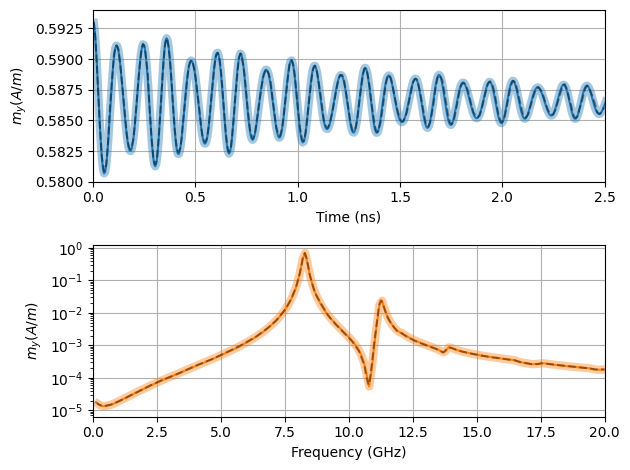

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("data/log.dat")
data_ref = np.loadtxt("ref/m_ref.dat")
data_oommf_t = np.loadtxt("ref/oommf_t.dat")
data_oommf_f = np.loadtxt("ref/oommf_f.dat")

t, mx, my, mz = data.T
t_ref, mx_ref, my_ref, mz_ref = data_ref.T
t_oommf, my_oommf = data_oommf_t.T
f_oommf, sy_oommf = data_oommf_f.T

sy = abs((np.fft.fft(my)**2.))
sy_ref = abs((np.fft.fft(my_ref)**2.))
f = np.fft.fftfreq(len(t), t[1]-t[0])*1e-9
f_ref = np.fft.fftfreq(len(t_ref), t_ref[1]-t_ref[0])*1e-9


fig, (ax0, ax1) = plt.subplots(2,1)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax0.plot(t*1e9, my, color=cycle[0])
ax0.plot(t_ref*1e9, my_ref, '-', color=cycle[0], linewidth=6, alpha=0.4)
ax0.plot(t_oommf, my_oommf, '--', color="black", alpha=0.4)
ax0.set_xlabel("Time (ns)")
ax0.set_ylabel("$m_y (A/m)$")
ax0.set_xlim(0, 2.5)
ax0.set_ylim(0.580, 0.594)
ax0.grid()

ax1.plot(f[2: -len(f)//2], sy[2: -len(f)//2], '-', color=cycle[1])
ax1.plot(f_ref[2: -len(f_ref)//2], sy_ref[2: -len(f_ref)//2], '-', color=cycle[1], linewidth=6, alpha=0.4)
ax1.plot(f_oommf, sy_oommf, '--', color="black", alpha=0.4)
ax1.set_yscale("log")
ax1.set_xlabel("Frequency (GHz)")
ax1.set_ylabel("$m_y (A/m)$")
ax1.set_xlim(0, 20)
ax1.grid()
fig.tight_layout()
fig.savefig("data/results.png")